In [11]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [12]:
env = gym.make("Taxi-v3", render_mode=None)

In [13]:
state_space = env.observation_space.n
action_space = env.action_space.n
q_table = np.zeros((state_space, action_space))

alpha = 0.1       
gamma = 0.6
epsilon = 0.1

max_episodes = 10000
converged = False
rewards_per_episode = []

In [9]:
for episode in range(max_episodes):
    state = env.reset()[0]
    total_reward = 0
    done = False
    truncated = False
    while not (done or truncated):
        
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])

        next_state, reward, done, truncated, _ = env.step(action)

        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        new_value = old_value + alpha * (reward + gamma * next_max - old_value)
        q_table[state, action] = new_value

        state = next_state
        total_reward += reward

    rewards_per_episode.append(total_reward)

    if episode > 100 and np.mean(rewards_per_episode[-100:]) > 8:
        converged = True
        print(f"Convergiu no episódio {episode}")
        break

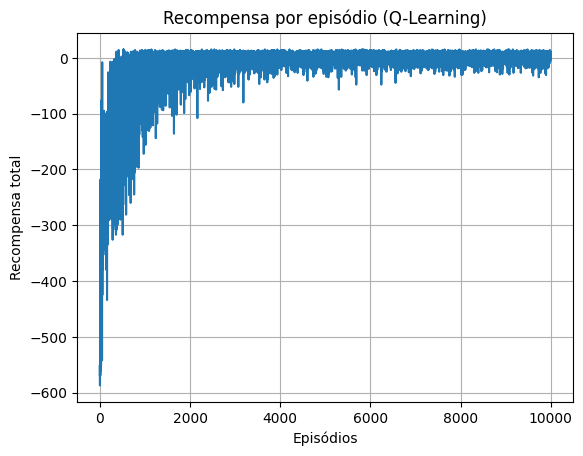

In [10]:
plt.plot(rewards_per_episode)
plt.xlabel('Episódios')
plt.ylabel('Recompensa total')
plt.title('Recompensa por episódio (Q-Learning)')
plt.grid(True)
plt.show()